In [1]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import language_tool_python

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  # or another classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Optional: For Named Entity Recognition / Custom Skill Extraction
import spacy  # spaCy model for skill/entity detection
# Reading resumes from files
import docx
import PyPDF2
import os


import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df =pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("UpdatedResumeDataSet.csv")
X = df['Resume']
y = df['Category']


tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder



models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Linear SVM": LinearSVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"📊 Model: {name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    print("-" * 50)


📊 Model: Logistic Regression
Accuracy: 0.9948186528497409
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
   

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create and fit the label encoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Check mapping
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("🔁 Label Mapping:\n", label_map)


🔁 Label Mapping:
 {'Advocate': 0, 'Arts': 1, 'Automation Testing': 2, 'Blockchain': 3, 'Business Analyst': 4, 'Civil Engineer': 5, 'Data Science': 6, 'Database': 7, 'DevOps Engineer': 8, 'DotNet Developer': 9, 'ETL Developer': 10, 'Electrical Engineering': 11, 'HR': 12, 'Hadoop': 13, 'Health and fitness': 14, 'Java Developer': 15, 'Mechanical Engineer': 16, 'Network Security Engineer': 17, 'Operations Manager': 18, 'PMO': 19, 'Python Developer': 20, 'SAP Developer': 21, 'Sales': 22, 'Testing': 23, 'Web Designing': 24}


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)


In [11]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

y_pred_encoded = model.predict(X_test)


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:27:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [12]:
# Convert numeric predictions back to original category names
y_pred = le.inverse_transform(y_pred_encoded)
y_test_labels = le.inverse_transform(y_test)

from sklearn.metrics import classification_report, accuracy_score

print("✅ Accuracy:", accuracy_score(y_test_labels, y_pred))
print("📄 Classification Report:\n", classification_report(y_test_labels, y_pred))


✅ Accuracy: 1.0
📄 Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      1.00      1.00        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   

In [13]:
import pickle

# Save model and encoder
with open("resume_classifier.pkl", "wb") as f:
    pickle.dump(model, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)


In [14]:
def predict_job_role(resume_text):
    # Load pre-trained components
    with open("resume_classifier.pkl", "rb") as f:
        model = pickle.load(f)
    with open("label_encoder.pkl", "rb") as f:
        le = pickle.load(f)
    with open("tfidf_vectorizer.pkl", "rb") as f:
        tfidf = pickle.load(f)
    
    # Vectorize input
    resume_tfidf = tfidf.transform([resume_text])
    
    # Predict
    pred_encoded = model.predict(resume_tfidf)
    pred_label = le.inverse_transform(pred_encoded)[0]
    
    return pred_label


In [15]:
resume_text = df['Resume'][500]
print("Predicted Job Role:", predict_job_role(resume_text))


Predicted Job Role: Electrical Engineering


In [16]:
proba = model.predict_proba(tfidf.transform([resume_text]))
confidence = round(100 * max(proba[0]), 2)
print(f"✅ Confidence Score: {confidence}%")


✅ Confidence Score: 98.15%


C:\Users\Hp\AppData\Local\Temp\ipykernel_13684\3616003906.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=classes, palette='Blues_d')


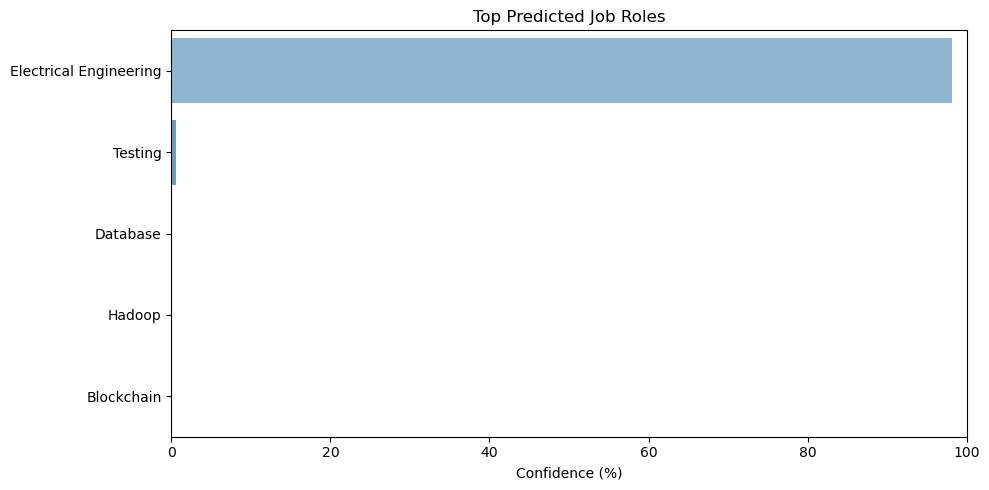

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_top_predictions(text, model, tfidf, label_encoder, top_n=5):
    vec = tfidf.transform([text])
    proba = model.predict_proba(vec)[0]
    classes = label_encoder.inverse_transform(np.argsort(proba)[-top_n:][::-1])
    scores = np.sort(proba)[-top_n:][::-1] * 100

    plt.figure(figsize=(10, 5))
    sns.barplot(x=scores, y=classes, palette='Blues_d')
    plt.xlabel("Confidence (%)")
    plt.title("Top Predicted Job Roles")
    plt.xlim(0, 100)
    plt.tight_layout()
    plt.show()
plot_top_predictions(resume_text, model, tfidf, le)



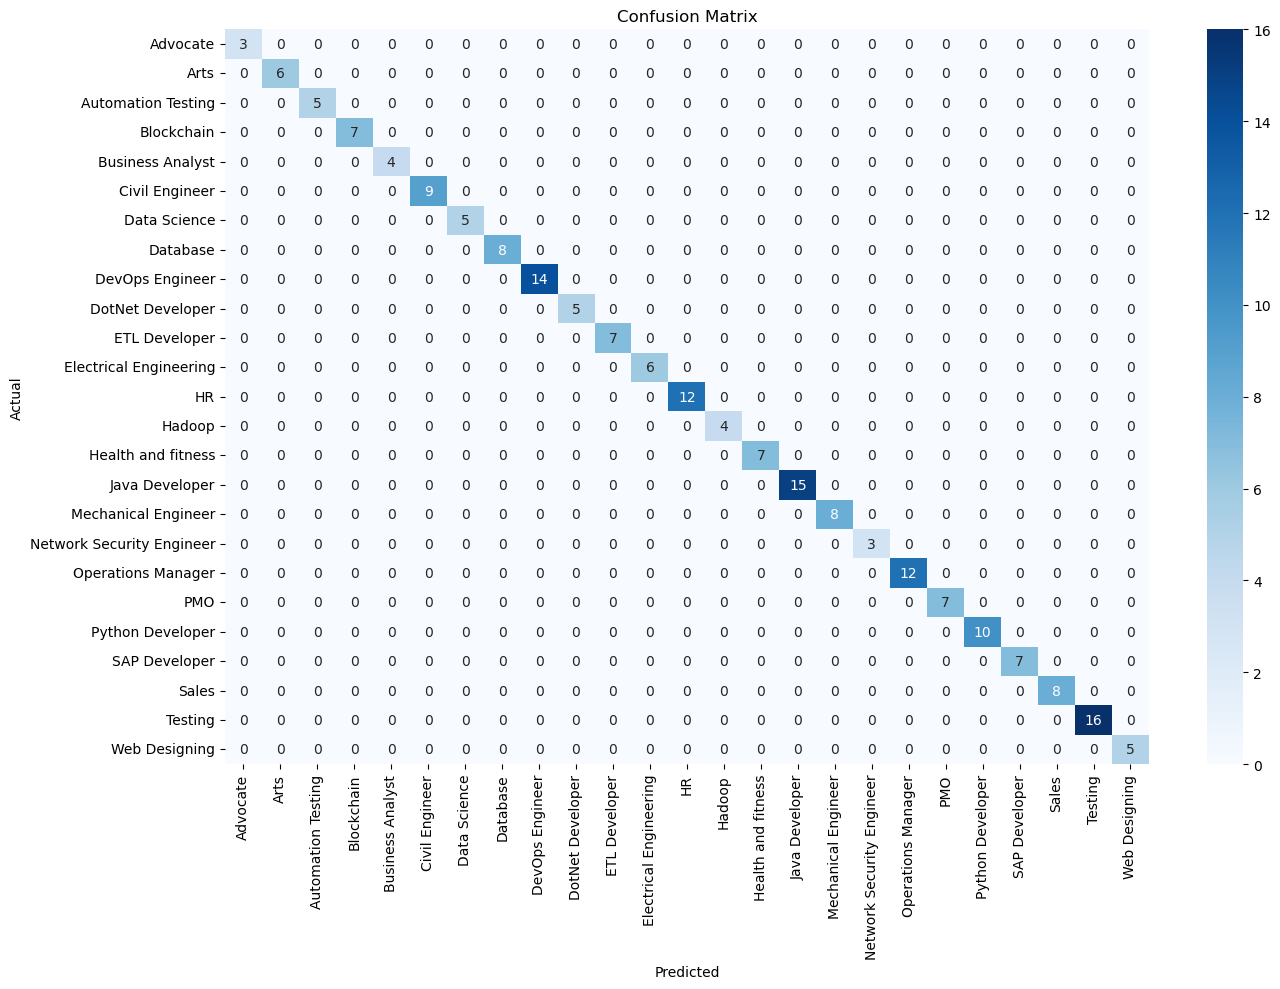

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, label_encoder):
    cm = confusion_matrix(y_true, y_pred)
    labels = label_encoder.classes_

    plt.figure(figsize=(14, 10))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
y_test_pred = model.predict(X_test)
plot_confusion_matrix(y_test, y_test_pred, le)


In [69]:
import os
import fitz  # PyMuPDF

# Step 1: Look for a PDF file in a specific folder
FOLDER_PATH = './resumes'  # Make sure this folder exists
pdf_files = [f for f in os.listdir(FOLDER_PATH) if f.endswith('.pdf')]

if not pdf_files:
    print("❌ No PDF files found in the './resumes' folder.")
else:
    # Step 2: Select the first PDF file automatically
    file_path = os.path.join(FOLDER_PATH, pdf_files[0])
    print(f"📄 Found Resume: {file_path}")
    
    # Step 3: Extract text using PyMuPDF
    try:
        doc = fitz.open(file_path)
        text_from_pdf = ""
        for page in doc:
            text_from_pdf += page.get_text()
        doc.close()

        # Step 4: Print the extracted resume text
        print("\n🔍 Extracted Resume Text :\n")
        print(text_from_pdf)  # Preview of long resumes
    except Exception as e:
        print("❌ Error reading PDF:", e)



📄 Found Resume: ./resumes\My Resume.pdf

🔍 Extracted Resume Text :

Vansh Gupta 
Post Graduate Student 
To apply my expertise in Machine Learning, Data Science, and Python to build impactful, data-driven
solutions. With a strong foundation from BCA and ongoing MCA, I bring experience in backend
development, database management (MySQL, Oracle), and data analysis, aiming to contribute to
innovation and organizational growth. 
vanshgpt2911@gmail.com 
+91 7982346690 
New delhi, India 
29 November, 2003 
linkedin.com/in/vansh-gupta-3835ba26a 
EDUCATION 
MCA 
Vivekananda Institute of Professional
Studies,GGSIPU 
08/2024 - Present,  
New Delhi,Delhi 
BCA 
Bharati Vidyapeeth deemed to be University,
New Delhi, India 
07/2021 - 07/2024,  
New Delhi,Delhi 
COURSE:-Data Science. 
Madrid Software Training Center 
09/2024 - Present,  
New Delhi,Delhi 
PERSONAL PROJECTS 
YouTube Toxic Comment Analyzer | Python, NLP,
Streamlit, scikit-learn, Youtube API 
Built an NLP web app to classify YouTube comme

In [71]:
proba = model.predict_proba(tfidf.transform([resume_text]))
confidence = round(100 * max(proba[0]), 2)
print(f"✅ Confidence Score: {confidence}%")

✅ Confidence Score: 98.81%


In [73]:
print("Predicted Job Role:", predict_job_role(resume_text))

Predicted Job Role: Data Science


In [90]:
import pickle
# Load model and vectorizer
model = pickle.load(open("resume_classifier.pkl", "rb"))
with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)
vectorizer = pickle.load(open("tfidf_vectorizer.pkl", "rb"))


In [1]:
predicted_class = model.predict(X_input)[0]  # example: 6
job_role = le.inverse_transform([predicted_class])[0]
print(f"🎯 Predicted Job Role: {job_role}")


NameError: name 'model' is not defined

In [3]:
pip install PyMuPDF


Note: you may need to restart the kernel to use updated packages.
